In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
p0 = 4.218709065 * np.float_power(10,7)
w0 = 7.29219108 * np.float_power(10,-5)

In [3]:
w0_sqr = np.float_power(w0,2)
p0_sqr = np.float_power(p0,2)

In [4]:
a, b, c = -w0_sqr, 2*w0_sqr*p0, -2*w0/p0
A = np.array([[0, 1, 0, 0],
              [a, 0, 0, b],
              [0, 0, 0, 1],
              [0, c, 0, 0]])

In [5]:
a = -1/p0_sqr
B = np.array([[0, 0],
              [1, 0],
              [0, 0],
              [0, a]])

In [9]:
def system(t, z, u=np.zeros(2)):
    return np.matmul(A,z) + np.matmul(B,u)

def plot_system(labels, z1, string):
    fig, ax = plt.subplots(4, 1, sharex=True)
    fig.suptitle('Εξέλιξη του δυναμικού συστήματος στο χρόνο\nγια z1=%i ' %z1 + str(string))
    for i in range(4):
        ax[i].plot(solution.t, solution.y[i,:])
        ax[i].set_ylabel(labels[i])
    ax[3].set_xlabel('time (seconds)')
    plt.show()
    return

In [7]:
time_in_sec = 3 * 24 * 3600
z0 = np.array([100, 0, 0, 0])

In [8]:
solution = solve_ivp(fun=system, t_span=[0,time_in_sec], y0=z0, dense_output=True, 
                      max_step=60)

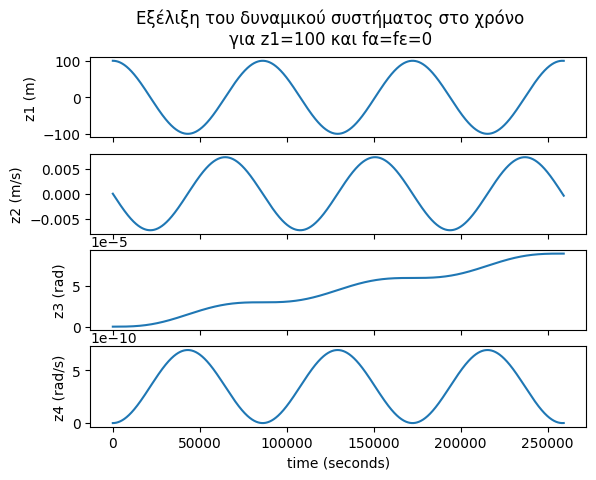

In [10]:
labels = ['z1 (m)', 'z2 (m/s)', 'z3 (rad)', 'z4 (rad/s)']
plot_system(labels, 100, string='και fα=fε=0')

In [11]:
time_in_sec = 3.3 * 3600
z0 = np.array([0, 0, 0, 0])
u = np.array([0, -1])

In [12]:
solution = solve_ivp(fun=system, t_span=[0,time_in_sec], y0=z0, dense_output=True, 
                      args=(u,), max_step=30)

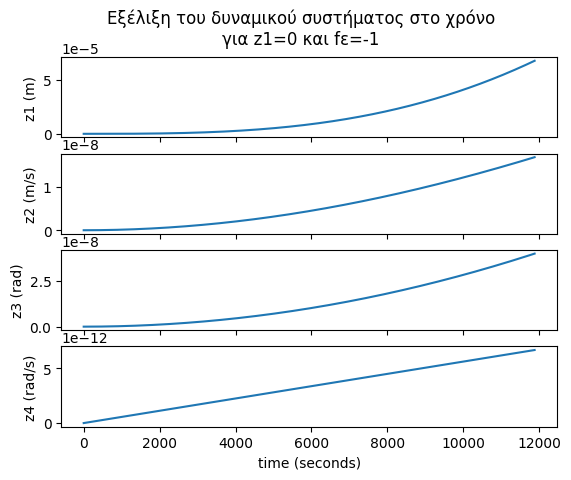

In [13]:
plot_system(labels, 0, string='και fε=-1')